# DETE and TAFE Employee Resignment Analysis
**In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia**

**Our goal is to solve two primary questions.**

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

<br>*My hypothesis is that, new employee or people who work less than 3 years in the institue are more likely to resign because of dissatisfaction, but whether it is true, we will see the data analysis result.*</br>

**Here are some dictionary for the DETE and TAFE datasets**

|Column        |Explanation|
|--------------|------------|
|ID            |An id used to identify the participant of the survey|
|SeparationType|The reason why the person's employment ended|
|Cease Date    |The year or month the person's employment ended|
|DETE Start Date| The year the person began employment with the DETE|

|Column        |Explanation|
|--------------|------------|
|Record ID|An id used to identify the participant of the survey|
|Reason for Ceasing Employement|The reason why the person's employment ended|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|


In [69]:
#Read dataset
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dete_survey = pd.read_csv('dete_survey.csv', na_values="Not Stated") #Nan value is writen as "Not State""
tafe_survey = pd.read_csv('tafe_survey.csv')

In [70]:
#Check the columns inifo
dete_survey.info()
print('/n')
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [71]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [72]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [73]:
#See the amount of null value in each dataframe
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [74]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Now it looks like we have many columns in each dataset. However, rememver our goal, many columns are actually irrelavant to our analysis, we will drop them.

In [75]:
#Drop columns that are irrelavent to our analysis
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [76]:
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Next, we will use some ```df.str()``` method to standardize our column name, so that later, it will be easier for us to combine them.

In [77]:
#Standardize column names
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(" ","_")
tafe_survey.columns = tafe_survey.columns.str.lower().str.strip().str.replace(" ","_")

In [78]:
#check the new dataframe
dete_survey.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [79]:
tafe_survey.head()

,record_id,institute,workarea,cessation_year,reason_for_ceasing_employment,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender._what_is_your_gender?,currentage._current_age,employment_type._employment_type,classification._classification,lengthofserviceoverall._overall_length_of_service_at_institute_(in_years),lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [80]:
#Change tafe dataset's column names, to make sure it is consolidated with dete dataset
new_name_tafe={'record_id':'id',
'cessation_year':'cease_date',
'reason_for_ceasing_employment':'separationtype',
'gender._what_is_your_gender?':'gender',
'currentage._current_age':'age',
'employment_type._employment_type':'employment_status',
'classification._classification':'position',
'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)':'institute_service',
'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)':'role_service',}
tafe_survey.rename(columns=new_name_tafe, inplace = True)

In [81]:
tafe_survey.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Resignation Type Cleaning 
Since we only need to analyse people who leave work because of resignation.We will filter out rows with people with other reasons of leavig work.

In [82]:
#See how many types of separation is in the dataset
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [83]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We noticed that there are three type of resignation in dete dataset, for us, we will rule out the specific reason, and categorize them as "resignation" only.

In [84]:
#Extract the resignation data from "seperationtype" column
pattern = r"(?P<reason>Resignation-[A-Z][a-z]{3,}\s[a-z]{7,}/?[a-z]?[a-z]?[a-z]?[a-z]?[a-z]?[a-z]?[a-z]?[a-z]?[a-z]?[a-z]?)"
resignation = dete_survey['separationtype'].str.extract(pattern)

#resign it to dete dataset
dete_survey['reason'] = resignation




In [85]:
tafe_resignation = tafe_survey[tafe_survey['separationtype']=='Resignation']
tafe_resignation.head()

,id,institute,workarea,cease_date,separationtype,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [86]:
dete_resignation = dete_survey[dete_survey['reason'].notnull()]
dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,reason
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,Resignation-Other reasons
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,Resignation-Other reasons
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,Resignation-Other reasons
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,Resignation-Other employer
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,Resignation-Move overseas/interstate


In [87]:
#value_counts() after fatching data
dete_resignation['reason'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: reason, dtype: int64

In [88]:
tafe_resignation['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Date time cleaninig ##
After we took care of the resignation type of each data set, we neet take a closer look at each date as well. In order to make the data validated, we need to make sure:

1. No stop date is ealier than start date.
2. None of the startdate is ealrier than 1940, as we assume people only start working after they reach 20.




<br>DETE Data Set</br>

In [174]:
#Check cease_date column
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [90]:
#Use string method to seperate the number and only take the year
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1].astype(float)
dete_resignation['cease_date'].value_counts()

<ipython-input-90-4e8480801f12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1].astype(float)


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [175]:
#check dete_start_date column
dete_resignation['dete_start_date'].value_counts(ascending=True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

[(1950.0, 2020.0)]

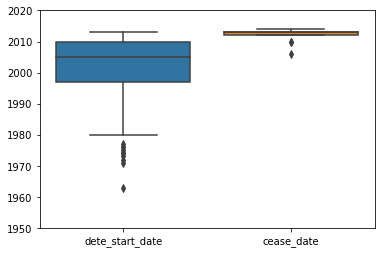

In [92]:
# use seaborn boxplot to see the distribution of time
g= sns.boxplot(data=dete_resignation[['dete_start_date','cease_date']])
g.set(ylim=(1950,2020))

TAFE Data Set

In [176]:
#check cease_date column
tafe_resignation['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

## Service Date Cleaning ##
We can see that in TAFE data set, we already have a column called ```institude_serviece```, which represent the amount of time a employee was in service. Since it contain important information for our analysis, we will create a same column for DETE data set.

In [94]:
# Use cease_date - dete_start_date to create a new column
dete_resignation.loc[:,'institute_service'] = 
dete_resignation['cease_date'] - dete_resignation['dete_start_date']

C:\Users\39632\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\39632\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [95]:
#Check the new column
dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,reason,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,Resignation-Other reasons,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,Resignation-Other reasons,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,Resignation-Other reasons,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,Resignation-Other employer,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,Resignation-Move overseas/interstate,3.0


In [96]:
tafe_resignation['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

## Analysis ##
Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.
<br>

|TAFE                                |DETE                                    |
|------------------------------------|------------------------------------------|
|```Contributing Factors. Dissatisfaction```|```job_dissatisfaction```                    |
|```Contributing Factors. Job Dissatisfaction```|```dissatisfaction_with_the_department```  |
|                                               |```physical_work_environment```            |
|                                          |```lack_of_recognition```                 |
|                                          |```work_location```                       |                 
|                                          |```employment_conditions```               |
|                                          |```work_life_balance```                  | 
|                                          |```workload```                            |
</br>

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.


In [97]:
tafe_resignation['contributing_factors._dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors._dissatisfaction, dtype: int64

In [98]:
tafe_resignation['contributing_factors._job_dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors._job_dissatisfaction, dtype: int64

Now creating a new columns in each dataframe, indicate weather the employee resignated because of jobsatisfaction. We will use ```df.any()``` method, but before that, we need to transfer the value in ```contributing_factors._dissatisfaction``` and ```contributing_factors._job_dissatisfaction``` in the TAFE dataframe into True, False and Nan

In [99]:
#Creating a function to idetify the "True" value in contributing_factors._dissatisfaction and contributing_factors._job_dissatisfaction
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True        

#Apply the function using applymap()
tafe_resignation.loc[:,['contributing_factors._dissatisfaction','contributing_factors._job_dissatisfaction']]=tafe_resignation.loc[:,['contributing_factors._dissatisfaction','contributing_factors._job_dissatisfaction']].applymap(update_vals)


C:\Users\39632\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [100]:
tafe_resignation['contributing_factors._dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: contributing_factors._dissatisfaction, dtype: int64

In [101]:
tafe_resignation['contributing_factors._job_dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: contributing_factors._job_dissatisfaction, dtype: int64

In [102]:
#Apply df.any() method
tafe_resignation.loc[:,'dissatisfied_mark'] = tafe_resignation.loc[:,['contributing_factors._dissatisfaction','contributing_factors._job_dissatisfaction']].any(axis='columns', skipna=False)
tafe_resignation.loc[:,'dissatisfied_mark'].value_counts(dropna=False)

C:\Users\39632\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\39632\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


False    241
True      91
NaN        8
Name: dissatisfied_mark, dtype: int64

In [104]:
dete_resignation.loc[:,'dissatisfied_mark'] = dete_resignation[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions','work_life_balance', 'workload']].any(axis='columns', skipna=False)
dete_resignation.loc[:,'dissatisfied_mark'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied_mark, dtype: int64

## Combining the data ##

In [105]:
# create a column called 'institute' for both data set
dete_resignation_up = dete_resignation.copy()
tafe_resignation_up = tafe_resignation.copy()

dete_resignation_up['institute'] = "DETE"
tafe_resignation_up['institute'] = "TAFE"

In [106]:
#combined both data.
combined=pd.concat([dete_resignation_up,tafe_resignation_up],ignore_index=True)
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

Since many columns are irrelavant for our study, and also contains many missing value, we decide to drop any columns that contain more than 500 missing values.

In [177]:
#Drop columns with more than 500 Nan
combined = combined.dropna(thresh=500,axis=1)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied_mark  651 non-null    bool   
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: bool(1), float64(3), object(7)
memory usage: 51.6+ KB


You may also notice that the institute_service columns contain different type of information. Next we will use regular expression again, to facth our data into a useful format

In [178]:
combined['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [108]:
#Standardize institute_service columns
combined['institute_service']= combined['institute_service'].astype(str)
combined['institute_service']= combined['institute_service'].str.extract(r"(\d+)")
combined['institute_service']= combined['institute_service'].astype(float)
combined['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

After we standardized the ```institude_service``` column, now it is time for us to make it into categories. We will categorize our ```institute_service``` by using: 

1. New: Less than 3 years at a company
2. Experienced: 3-6 years at a company
3. Established: 7-10 years at a company
4. Veteran: 11 or more years at a company

In [ ]:
#Create a function categorize employees' experience
def experience(number):
    if pd.isnull(number):
        return np.nan
    elif number <= 3:
        return "New"
    elif number > 3 and number <=6:
        return "Experienced"
    elif number > 6 and number <=10:
        return "Estalished"
    else:
        return "Veteran"

#Use apply function to create a service_cat column
combined['service_cat'] = combined['institute_service'].apply(experience)
combined['service_cat'].value_counts()

Now we will fill the missing value in ```dissatisfied_mark``` column with mode.

In [110]:
combined['dissatisfied_mark'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied_mark, dtype: int64

In [114]:
#Fill the missing value to the majority of value False
combined['dissatisfied_mark'] = combined['dissatisfied_mark'].fillna(False)
combined['dissatisfied_mark'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied_mark, dtype: int64

In [167]:
#Check dissatisfied_mark column with service_cat as a filter
combined.pivot_table(values="dissatisfied_mark", index='service_cat')

             dissatisfied_mark
service_cat                   
Estalished            0.516129
Experienced           0.404494
New                   0.289855
Veteran               0.485294


<AxesSubplot:xlabel='service_cat', ylabel='dissatisfied_mark'>

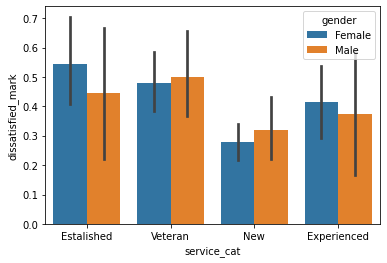

In [179]:
#bar plot
%matplotlib inline
sns.barplot(x='service_cat',y='dissatisfied_mark',data = combined,hue='gender')

# Conclusion
Now after clean and analyse our data, we can come up with following conclusion:

1. People wo have 7-10 years of work experience are more likely to resign due to dissatisfaction.
2. The completely opposite of what I expected, new employees have the lowest resignation rate due to dissatisfaction.
3. Veteran, people who work ther for more than 11 years have almost the same percentage of dissatisfaction rate for resignation as people who have established experience.
4. Women tend to resign more in the begginging and end of their career due to dissatisfaction, while men tend to resign in their mid career due to the same reason.